In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn

#### SET DING0 SETTINGS

In [3]:
# TODO set in config file
ding0_default=False
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [4]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [7]:
%%time

print('ding0_default', ding0_default)
if ding0_default:
    
    lv_stations, lv_grid_districts = nd.import_mv_grid_districts(session, 
                                                                 mv_grid_districts_no=mv_grid_districts)

else:
    
    graph, geo_load_area, geo_load_area_buff, ways, ways_sql_df = nd.import_mv_grid_districts(session, ding0_default, 
                                                                                        mv_grid_districts_no=mv_grid_districts,
                                                                                        need_parameterization=True,
                                                                                        retain_all=True, 
                                                                                        truncate_by_edge=False)

ding0_default False


Graph already fully connected.


Wall time: 2.51 s


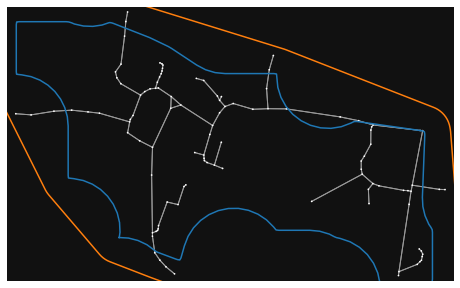

In [8]:
import osmnx as ox
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(graph, node_size=3, show=False, close=False)

x,y = geo_load_area.exterior.xy
plt.plot(x,y)

x,y = geo_load_area_buff.exterior.xy
plt.plot(x,y)

#fig.savefig("Plot.pdf",dpi=300, bbox_inches='tight')


In [7]:
import networkx as nx
nx.number_weakly_connected_components(graph)

1